In [6]:
#Experiment was run with a d430 Node.

import pandas as pd

df = pd.read_csv("./cstate_flink_results.csv")
dfaddtl = pd.read_csv("./cstate_flink_addtlinfo.csv")
df = pd.merge(dfaddtl, df, on=["STATE", "POLICY", "RATE"], how="outer")
df = df[df["numRecordsOutPerSecond_avg"] >= (df["RATE"] * 0.95)]

# Filtering out rows that didn't meet the specified range.
#df = df[abs(df["numRecordsOutPerSecond_avg"] - df["RATE"]) <= (0.05*df["RATE"])]

# Drop residency data - retrieved the info from the wrong machine!
df = df.drop(columns=["POLL_RES", "C1_RES", "C1E_RES", "C3_RES", "C6_RES"])

dfEnabled = df[df["STATE"] == 0]
dfDisabled = df[df["STATE"] == 1]

display(dfEnabled)

,STATE,RATE,POLICY,numRecordsOutPerSecond_avg,PKG_ENERGY,RAM_ENERGY
100,0,1000,conservative,999.907843,7579.31,1465.61
101,0,1000,ondemand,998.728704,7577.97,1453.89
102,0,1000,performance,999.688889,7605.81,1462.78
103,0,1000,powersave,998.405556,7675.11,1468.98
104,0,1000,schedutil,998.952941,7600.96,1461.05
...,...,...,...,...,...,...
195,0,900,conservative,900.088889,7284.83,1446.43
196,0,900,ondemand,900.623148,7526.86,1478.52
197,0,900,performance,899.261111,7232.85,1448.53
198,0,900,powersave,899.838235,7592.52,1453.88


In [7]:
display(dfDisabled)

,STATE,RATE,POLICY,numRecordsOutPerSecond_avg,PKG_ENERGY,RAM_ENERGY
0,1,1000,conservative,998.791667,7546.72,1461.03
1,1,1000,ondemand,999.437255,7534.77,1441.66
2,1,1000,performance,998.827778,7127.18,1435.64
3,1,1000,powersave,998.935185,7357.15,1470.17
4,1,1000,schedutil,999.831481,7549.15,1451.02
...,...,...,...,...,...,...
95,1,900,conservative,900.010185,7526.15,1427.11
96,1,900,ondemand,899.965741,7549.95,1430.80
97,1,900,performance,899.837037,7506.64,1424.78
98,1,900,powersave,899.523148,7499.11,1455.91


<Figure size 640x480 with 0 Axes>

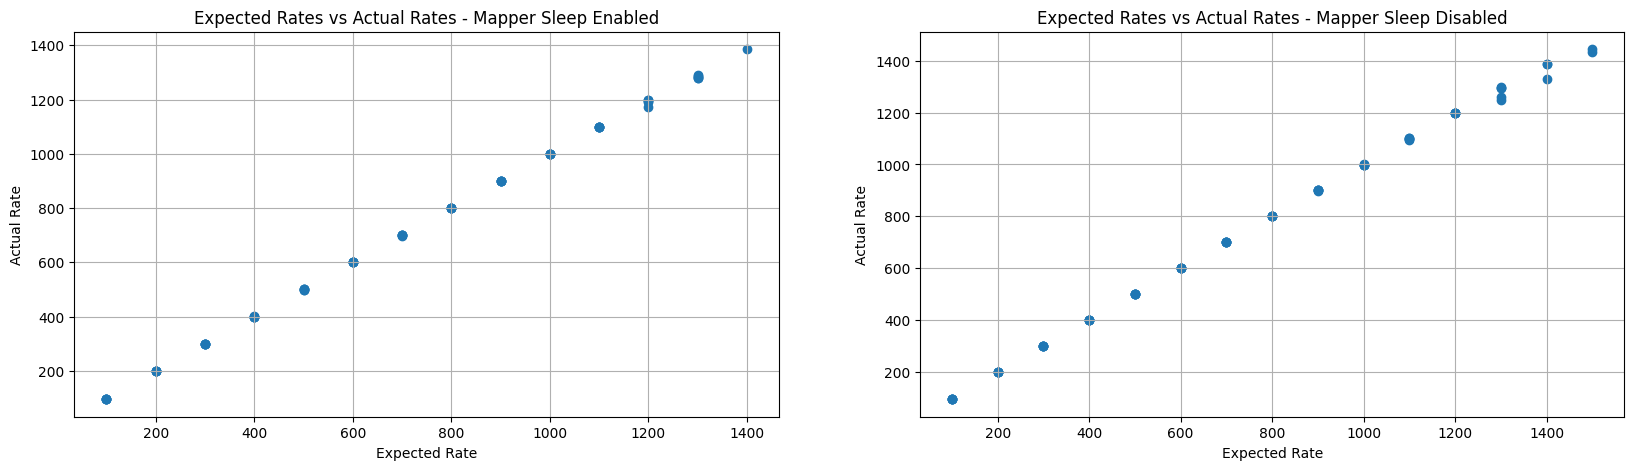

In [8]:
import matplotlib.pyplot as plt
plt.figure()

fig, plots = plt.subplots(1, 2, figsize=(20, 5))

plots[0].scatter(dfEnabled['RATE'], dfEnabled['numRecordsOutPerSecond_avg'])
plots[0].set_xlabel("Expected Rate")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Expected Rates vs Actual Rates - Mapper Sleep Enabled")
plots[0].grid(True)

plots[1].scatter(dfDisabled['RATE'], dfDisabled['numRecordsOutPerSecond_avg'])
plots[1].set_xlabel("Expected Rate")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Expected Rates vs Actual Rates - Mapper Sleep Disabled")
plots[1].grid(True)

plt.show()

<Figure size 640x480 with 0 Axes>

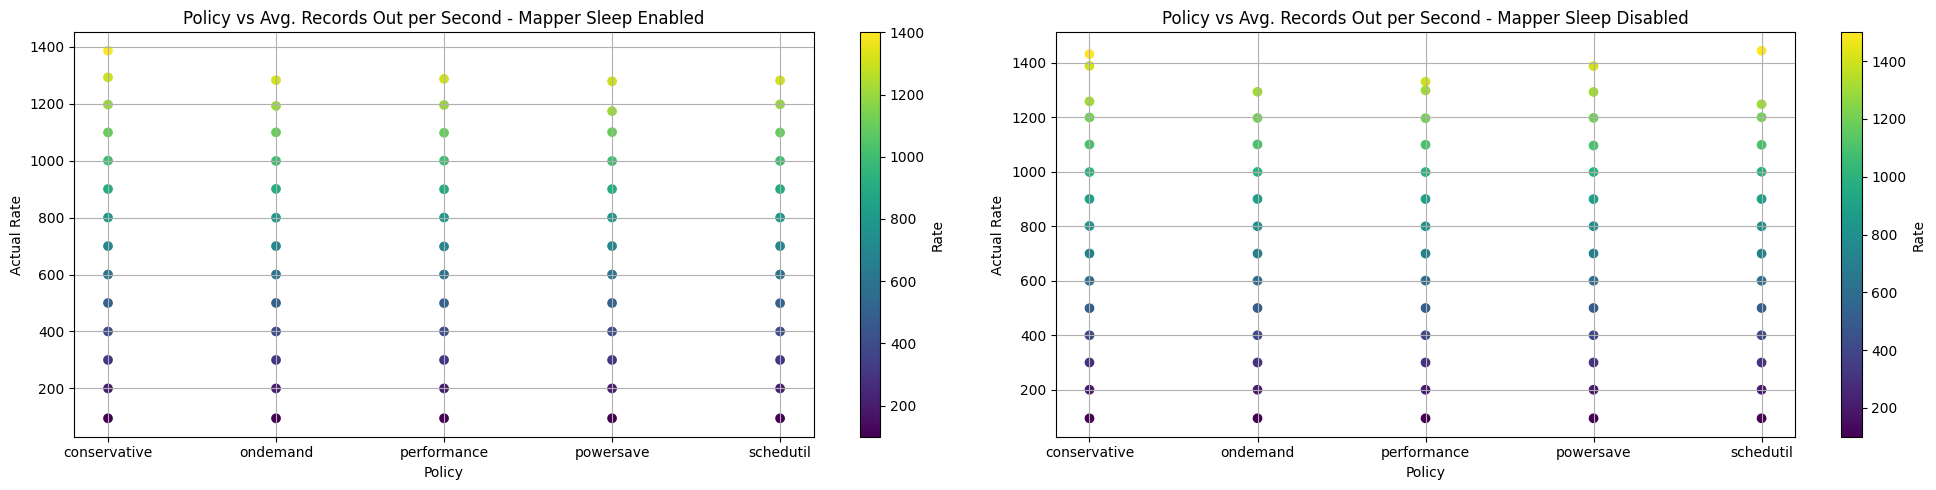

In [9]:
cmap = 'viridis'
plt.figure()
fig, plots = plt.subplots(1, 2, figsize=(20, 5))

scatter1 = plots[0].scatter(dfEnabled['POLICY'], dfEnabled['numRecordsOutPerSecond_avg'], c=dfEnabled['RATE'], cmap=cmap)
plots[0].set_xlabel("Policy")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Enabled")
plots[0].grid(True)
plt.colorbar(scatter1, ax=plots[0], label='Rate')

scatter2 = plots[1].scatter(dfDisabled['POLICY'], dfDisabled['numRecordsOutPerSecond_avg'], c=dfDisabled['RATE'], cmap=cmap)
plots[1].set_xlabel("Policy")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Disabled")
plots[1].grid(True)
plt.colorbar(scatter2, ax=plots[1], label='Rate')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

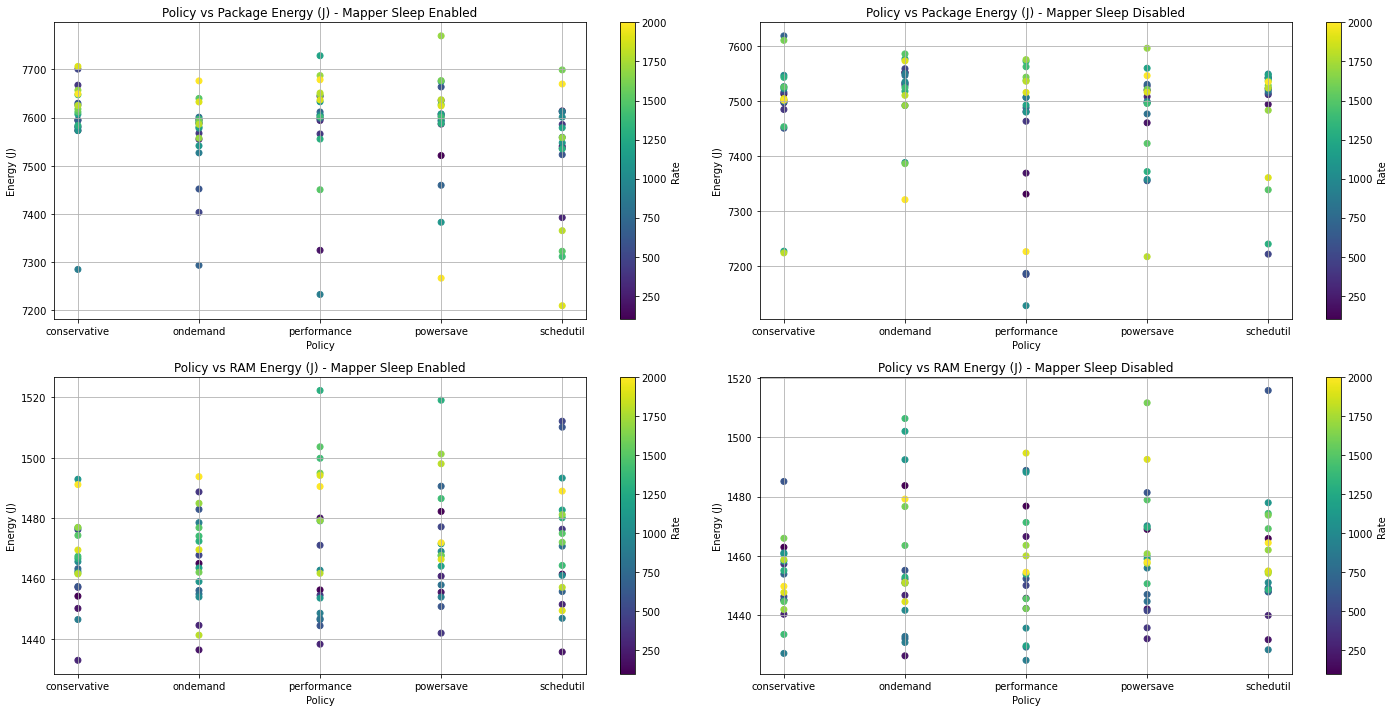

In [13]:
cmap = 'viridis'
plt.figure()
fig, plots = plt.subplots(2, 2, figsize=(20, 10))

scatter1 = plots[0][0].scatter(dfEnabled['POLICY'], dfEnabled['PKG_ENERGY'], c=dfEnabled['RATE'], cmap=cmap)
plots[0][0].set_xlabel("Policy")
plots[0][0].set_ylabel("Energy (J)")
plots[0][0].set_title("Policy vs Package Energy (J) - Mapper Sleep Enabled")
plots[0][0].grid(True)
plt.colorbar(scatter1, ax=plots[0][0], label='Rate')

scatter2 = plots[0][1].scatter(dfDisabled['POLICY'], dfDisabled['PKG_ENERGY'], c=dfDisabled['RATE'], cmap=cmap)
plots[0][1].set_xlabel("Policy")
plots[0][1].set_ylabel("Energy (J)")
plots[0][1].set_title("Policy vs Package Energy (J) - Mapper Sleep Disabled")
plots[0][1].grid(True)
plt.colorbar(scatter2, ax=plots[0][1], label='Rate')

scatter3 = plots[1][0].scatter(dfEnabled['POLICY'], dfEnabled['RAM_ENERGY'], c=dfEnabled['RATE'], cmap=cmap)
plots[1][0].set_xlabel("Policy")
plots[1][0].set_ylabel("Energy (J)")
plots[1][0].set_title("Policy vs RAM Energy (J) - Mapper Sleep Enabled")
plots[1][0].grid(True)
plt.colorbar(scatter3, ax=plots[1][0], label='Rate')

scatter4 = plots[1][1].scatter(dfDisabled['POLICY'], dfDisabled['RAM_ENERGY'], c=dfDisabled['RATE'], cmap=cmap)
plots[1][1].set_xlabel("Policy")
plots[1][1].set_ylabel("Energy (J)")
plots[1][1].set_title("Policy vs RAM Energy (J) - Mapper Sleep Disabled")
plots[1][1].grid(True)
plt.colorbar(scatter4, ax=plots[1][1], label='Rate')

plt.tight_layout()
plt.show()
